In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [20]:
reeses = cv2.imread("../DATA/reeses_puffs.png",0)

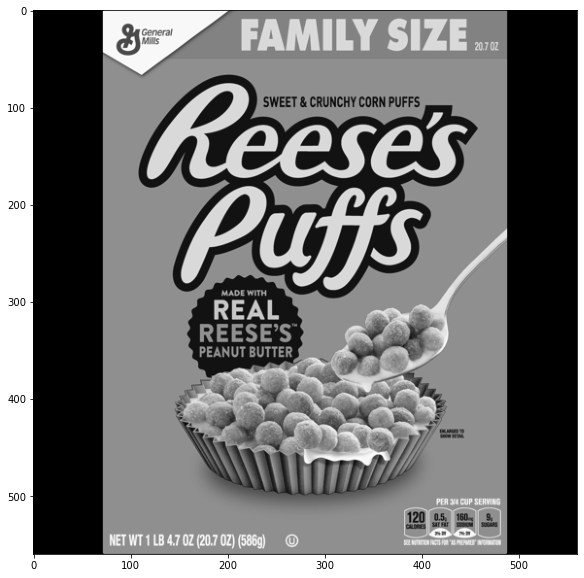

In [21]:
display(resses)

In [22]:
cereals = cv2.imread("../DATA/many_cereals.jpg",0)

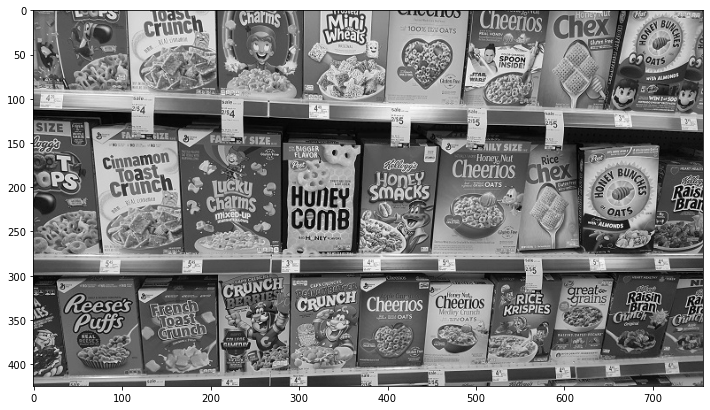

In [23]:
display(cereals)

In [24]:
#brute force detection with orb
orb = cv2.ORB_create()

In [26]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [27]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

In [29]:
matches = bf.match(des1,des2)

In [32]:
matches = sorted(matches, key=lambda x:x.distance)

In [35]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

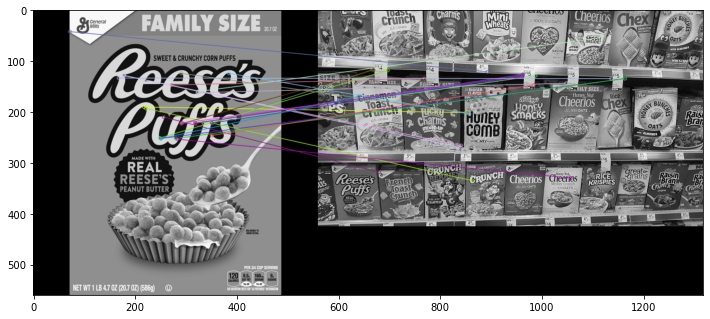

In [36]:
display(reeses_matches)

In [37]:
#SIFT - SCALE INVARIENT FEATURE TRANSFORM
sift = cv2.xfeatures2d.SIFT_create()

In [39]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [41]:
bf = cv2.BFMatcher()

In [42]:
matches = bf.knnMatch(des1,des2,k=2)

In [44]:
good = []
for match1, match2 in matches :
    #IF MATCH1 DISTANCE IS LESS THAN 75% OF MATCH2
    #THEN DESCRIPTOR IS A GOOD MATCH 
    if match1.distance < 0.75*match2.distance :
        good.append([match1])

In [49]:
len(good)

78

In [50]:
len(matches)

1500

In [51]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

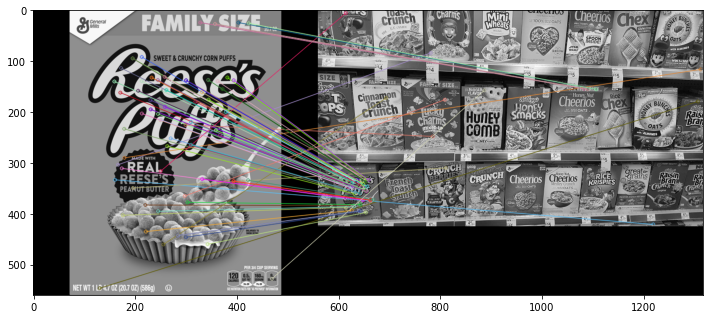

In [52]:
display(sift_matches)

In [68]:
sift = cv2.xfeatures2d.SIFT_create()

In [69]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [70]:
#FLANN :- FAST LIBRARY FOR APPROXIMATE NEAR NEIGHBOUR FAST THAN BRUTE FORCE BUT NOT BEST IN RESULT
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

In [71]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [72]:
matches = flann.knnMatch(des1,des2,k=2)

In [73]:
matchesMask = [[0,0] for i in range(len(matches))]

In [75]:
# good = []
for i, (match1, match2) in enumerate(matches) :
    if match1.distance < 0.7*match2.distance :
        matchesMask[i] = [1,0]
        # good.append([match1])

In [76]:
draw_params = dict(matchColor=(0,255,0),singlePointColor=(255,0,0), matchesMask=matchesMask, flags=0)

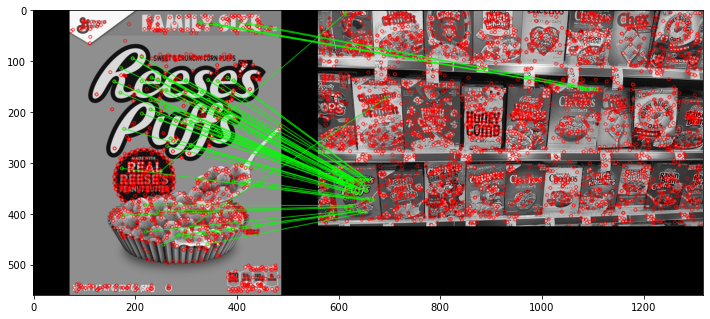

In [77]:
# flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=0) #if flags =2 get rid of samll dots
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params) #if flags =2 get rid of samll dots

display(flann_matches)